In [52]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [53]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [60]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_'+str(t)+'__'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [61]:
err

array([[0.34      , 0.36416667, 0.38083333, 0.3945    , 0.399     ,
        0.408     , 0.40683333, 0.41116667, 0.41516667, 0.417     ,
        0.419     , 0.42066667, 0.42183333, 0.42483333, 0.42483333,
        0.4235    , 0.42116667, 0.4225    , 0.42233333, 0.422     ,
        0.42233333, 0.42116667, 0.424     , 0.424     , 0.42233333,
        0.42383333, 0.42516667, 0.42533333, 0.42466667],
       [0.4585    , 0.48616667, 0.50533333, 0.51066667, 0.51166667,
        0.51516667, 0.5215    , 0.52416667, 0.52383333, 0.524     ,
        0.52466667, 0.52533333, 0.5245    , 0.52416667, 0.52583333,
        0.5235    , 0.52416667, 0.52483333, 0.5255    , 0.52633333,
        0.52616667, 0.5265    , 0.52583333, 0.52616667, 0.52716667,
        0.5275    , 0.52683333, 0.52833333, 0.52816667],
       [0.38916667, 0.42283333, 0.43516667, 0.44983333, 0.4535    ,
        0.45883333, 0.46466667, 0.467     , 0.465     , 0.4665    ,
        0.46833333, 0.46633333, 0.46666667, 0.46566667, 0.469     ,
  

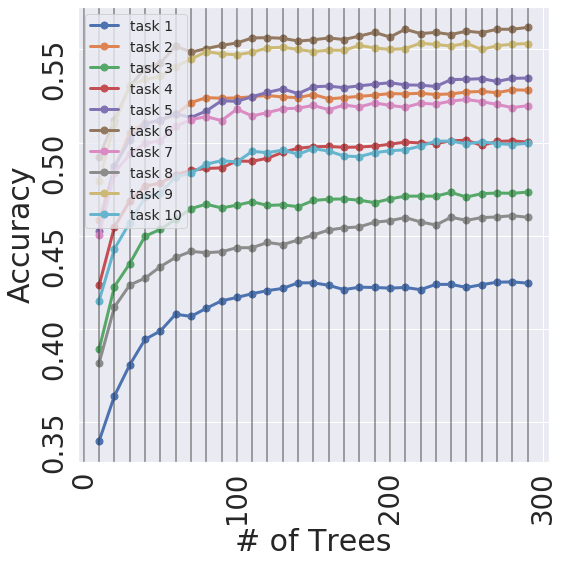

In [62]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)